# Analysis

### Load Packages

In [2]:
# Load the recorded loss values from the event file
from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util
import matplotlib.pyplot as plt
import os
import numpy as np

### Setup

In [3]:
path = 'workspace/models/efficientdet_d1_coco17_tpu-32/epochs_100-batch_size_4-learning_rate_0.01-aug_False'
train_path = os.path.join(path, 'train')
val_path = os.path.join(path, 'eval')

Train: 218, Eval: 1


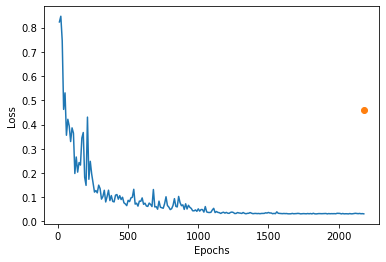

In [9]:
# Load the evaluation metrics event file
step_values = []
train_loss_values = []
val_loss_values = []

for event in summary_iterator(os.path.join(train_path, os.listdir(train_path)[-1])):
    for value in event.summary.value:
        if value.tag == "Loss/total_loss":
            loss = tensor_util.MakeNdarray(value.tensor)
            step_values.append(event.step)
            train_loss_values.append(loss)
            
for event in summary_iterator(os.path.join(val_path, os.listdir(val_path)[-1])):
    for value in event.summary.value:
        if value.tag == "Loss/total_loss":
            loss = tensor_util.MakeNdarray(value.tensor)
            val_loss_values.append(loss)
            
            
print(f"Train: {len(train_loss_values)}, Eval: {len(val_loss_values)}")
# Plot the loss curve using Matplotlib
plt.plot(np.array(step_values) / 10, train_loss_values)
plt.plot(step_values[-1] / 10, val_loss_values[-1], 'o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [59]:
def load_labelmap(path):
  """Loads label map proto.
  Args:
    path: path to StringIntLabelMap proto text file.
  Returns:
    a StringIntLabelMapProto
  """
  with tf.io.gfile.GFile(path, 'r') as fid:
    label_map_string = fid.read()
    label_map = string_int_label_map_pb2.StringIntLabelMap()
    return label_mapval_loss_values

In [60]:
# Import the necessary libraries
#from object_detection.utils import label_map_util
from object_detection.utils import metrics
from object_detection.protos import string_int_label_map_pb2
import tensorflow as tf

# Path to the event file generated during evaluation
event_file_path = 'workspace/models/efficientdet_d1_coco17_tpu-32/epochs_10-batch_size_4-learning_rate_0.001-aug_False/train'

# Path to the label map file used during training
label_map_path = 'workspace/data/label_map.pbtxt'

# Load the label map file
label_map = load_labelmap(label_map_path)
print(label_map)
#categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=10, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Extract the precision and recall values
prec_vals = []
for summary in summary_iterator(os.path.join(train_path, os.listdir(train_path)[-1])):
    for value in summary.summary.value:
        if value.tag == 'DetectionBoxes_Precision/mAP':
            prec_vals.append((value.tag, value.simple_value))
        elif value.tag == 'DetectionBoxes_Recall/AR@0.50IOU':
            prec_vals.append((value.tag, value.simple_value))

# Compute the average precision and recall over all classes
ap_per_class, mAP = metrics.compute_average_precision(category_index, prec_vals)

print('mAP: ', mAP)
for i in range(1, len(category_index)):
    print('AP for class {}: {}'.format(category_index[i]['name'], ap_per_class[i]))

NameError: name 'label_map_util' is not defined